In [1]:
# check Pillow version number
import PIL
print('Pillow Version:', PIL.__version__)

# load and show an image with Pillow
from PIL import Image

# load and display an image with Matplotlib
import matplotlib.pyplot as plt
from matplotlib import image
from matplotlib import pyplot
import numpy as np
import pandas as pd

import cv2
from skimage import io

import imageio  
import os

# load image and convert to and from NumPy array
from numpy import asarray

Pillow Version: 8.0.1


In [2]:
image_name = 'Sydney-Opera-House.jpg'

JPEG
RGB
(640, 360)


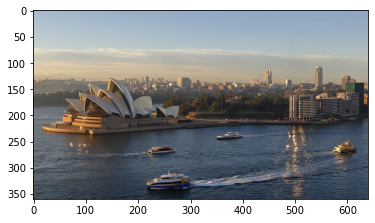

In [3]:
# load the image
image = Image.open('Sydney-Opera-House.jpg')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
plt.imshow(image)
#image.show()

uint8
(360, 640, 3)


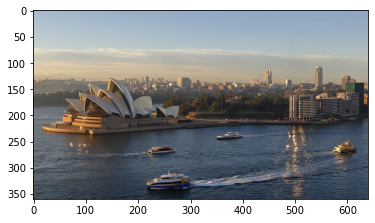

In [4]:
# load image as pixel array
data = imageio.imread('Sydney-Opera-House.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
plt.imshow(data)
plt.show()

In [ ]:
!pip install cv

### CV2 - https://www.pythonpool.com/cv2-imshow/#:~:text=The%20cv2%20is%20a%20cross-platform%20library%20designed%20to,used%20to%20add%20an%20image%20in%20the%20window.

To use CV2, you need to first install it - using the following command.
!pip install OpenCV-python

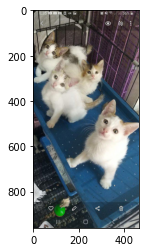

In [14]:
folder = "../data/train/"
image_name = "00a1ae8867e0bb89f061679e1cf29e80.jpg"
#image_name = "00a1e0c0f89ff89a8f32d42e9025f6b2.jpg"

#img = io.imread(image_name)[:, :, :-1]
img = io.imread(folder+image_name)
img.shape

plt.imshow(img)
plt.show()

In [15]:
# Then we can calculate the mean of each chromatic channel following a method analog to the one proposed by @Ruan B.:
average = img.mean(axis=0).mean(axis=0)
print(average)

[ 95.32038722 101.65044611 106.28736171]


In [16]:
pixels = np.float32(img.reshape(-1, 3))

n_colors = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)

**And finally the dominant colour is the palette colour which occurs most frequently on the quantized image:**

In [17]:
dominant = palette[np.argmax(counts)]
dominant

array([39.687847, 43.143887, 49.47042 ], dtype=float32)

The obtained values for the average colour, i.e. a colour whose components are the means of the three chromatic channels, and the dominant colour calculated throug k-means clustering are rather different:

In [19]:
print(average)
print(dominant)

[ 95.32038722 101.65044611 106.28736171]
[39.687847 43.143887 49.47042 ]


- type of data: **np.unit8** - can only store 8-bit numbers i.e., 0-255
- **np.ones()** in Python | numpy.ones() in Python
Numpy ones() is also referred to as np.ones or numpy.ones. This function creates a Numpy array whose each element is having a value of 1. Even array() function can be used for creating Numpy array whose each element's value is 1. Then the next question that comes to your mind is why do we need to use ones() function? Just understand the reason behind using ones() function with the help of a simple example- **np.ones(shape=(3, 10), dtype=int)**  

- **numpy.argsort()** function is used to perform an indirect sort along the given axis using the algorithm specified by the kind keyword. It returns an array of indices of the same shape as arr that that would sort the array.
**Parameters :**
arr : [array_like] Input array.  
axis : [int or None] Axis along which to sort. If None, the array is flattened before sorting. The default is -1, which sorts along the last axis.  
kind : [‘quicksort’, ‘mergesort’, ‘heapsort’]Selection algorithm. Default is ‘quicksort’.  
order : [str or list of str] When arr is an array with fields defined, this argument specifies which fields to compare first, second, etc.  

In [20]:
avg_patch = np.ones(shape=img.shape, dtype=np.uint8)*np.uint8(average)

In [21]:
indices = np.argsort(counts)[::-1]   
freqs = np.cumsum(np.hstack([[0], counts[indices]/float(counts.sum())]))
rows = np.int_(img.shape[0]*freqs)

In [22]:
print(img.shape)
print(img.shape[0])
print(freqs)
print(len(rows))


(960, 467, 3)
960
[0.         0.38729033 0.62349884 0.76156986 0.88717211 1.        ]
6


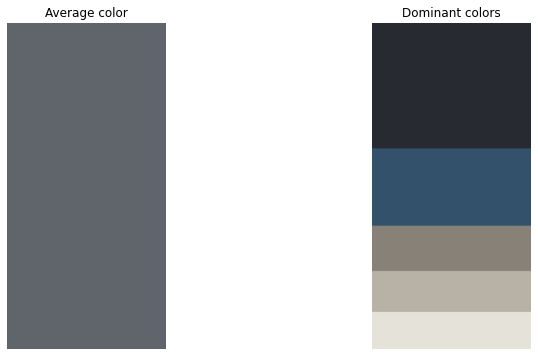

In [24]:
dom_patch = np.zeros(shape=img.shape, dtype=np.uint8)
for i in range(len(rows) - 1):
    dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])
    
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))
ax0.imshow(avg_patch)
ax0.set_title('Average color')
ax0.axis('off')
ax1.imshow(dom_patch)
ax1.set_title('Dominant colors')
ax1.axis('off')
plt.show(fig)

In [8]:
def find_palette(img):
    
    # Then we can calculate the mean of each chromatic channel following a method analog to the one proposed by @Ruan B.:
    average = img.mean(axis=0).mean(axis=0)
    
    pixels = np.float32(img.reshape(-1, 3))

    n_colors = 5
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
    flags = cv2.KMEANS_RANDOM_CENTERS

    _, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
    _, counts = np.unique(labels, return_counts=True)
    
    dominant = palette[np.argmax(counts)]
    
    avg_patch = np.ones(shape=img.shape, dtype=np.uint8)*np.uint8(average)
    
    indices = np.argsort(counts)[::-1]   
    freqs = np.cumsum(np.hstack([[0], counts[indices]/float(counts.sum())]))
    rows = np.int_(img.shape[0]*freqs)
    
#    dom_patch = np.zeros(shape=img.shape, dtype=np.uint8)
#    for i in range(len(rows) - 1):
#        dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])
    
    return (dominant, average, palette)
    

In [13]:
#path = "../data/train/"
path = "../data/examples/"

mp = np.empty(1, dtype=object)
image_list = []

files = os.listdir(path)

i = 0
for picture in files:
        
    img = io.imread(path+picture)
    #d, a, p = find_palette(image)
    d, a, p = find_palette(img)
    p =  p.reshape(1, 5*3)[0]
    
    image_list.append(picture.split('.')[0])
    r = np.append(p,[a,d])
    if len(mp) == 1:
        mp = r
    else: mp = np.vstack([mp, r])
    #print("Palette: ", mp)
    print(i)
    i +=1

#print(mp)
#print(image_list)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [14]:
mp.shape

(15, 21)

In [16]:
df = pd.DataFrame()
df["image"] = image_list
i = 1
for e in range(0,mp.shape[1]):
    df["col_"+str(i)] = mp[:, e]
    i +=1
#print(df)
df.to_csv("image_pallette_test3.csv", index=False)